# Task 4 - STOCK MARKET PREDICTION

Use a dataset of stock market data and build a model that can predict future stock prices

Importing libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
display (os.getcwd())

'C:\\Users\\AFIFA'

In [3]:
os.chdir ('C:\\Users\\AFIFA\\Downloads\\')
display (os.getcwd())

'C:\\Users\\AFIFA\\Downloads'

In [4]:
df =pd.read_csv("prices.csv", header=0)
display (df)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
print(df.shape)

(851264, 7)


In [6]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [7]:
print (df.symbol.value_counts())

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64


In [8]:
print (df.symbol.unique())

['WLTW' 'A' 'AAL' 'AAP' 'AAPL' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIZ' 'AJG' 'AKAM'
 'ALB' 'ALK' 'ALL' 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN'
 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO'
 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR'
 'BDX' 'BEN' 'BHI' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C'
 'CA' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CBS' 'CCI' 'CCL' 'CELG' 'CERN' 'CF'
 'CHD' 'CHK' 'CHRW' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COH' 'COL' 'COO' 'COP' 'COST' 'CPB' 'CRM'
 'CSCO' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLR' 'DLTR'
 'DNB' 'DOV' 'DOW' 'DPS' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'EA' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'ENDP' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES'
 'ESRX' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE

In [9]:
display(df.symbol.unique().shape)

(501,)

In [10]:
print (df.symbol.unique()[0:20])

['WLTW' 'A' 'AAL' 'AAP' 'AAPL' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN']


In [11]:
print(len(df.symbol.values))

851264


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [13]:
display (df.describe())

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [14]:
display (df.isnull().sum())

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [15]:
display (df.date.unique())

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [16]:
display (pd.DataFrame(df.date.unique()))

,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
3519,2016-12-23
3520,2016-12-27
3521,2016-12-28
3522,2016-12-29


In [17]:
display (df.duplicated().sum())

0

In [18]:
comp_info = pd.read_csv('securities.csv')
display (comp_info)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [19]:
print (comp_info["Ticker symbol"].nunique())

505


In [20]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [21]:
print (comp_info.isnull().sum())

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64


In [22]:
print (comp_info.describe())

                CIK
count  5.050000e+02
mean   7.074490e+05
std    5.144375e+05
min    1.800000e+03
25%    8.631200e+04
50%    8.310010e+05
75%    1.075531e+06
max    1.659166e+06


In [23]:
display(comp_info.loc[comp_info.Security.str.startswith('Face') , :])

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [24]:
display (comp_info.loc[comp_info.Security.str.startswith('Acc') , :])

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373


In [25]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [26]:
for i in comp_plot:
    print (i)

ADBE
FB
GS
MSFT
XRX
YHOO


In [28]:
def plotter(code):
    global closing_stock ,opening_stock
    
    f, axs = plt.subplots(2,2,figsize=(15,8))
    
    plt.subplot(212)
    
    company = df[df['symbol']==code]

    company = company.open.values.astype('float32')
    
    company = company.reshape(-1, 1)
    
    opening_stock = company

    
    plt.grid(True)
    plt.xlabel('Time') 
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') 
    plt.plot(company , 'g') 
    
    
    plt.subplot(211)
    
    company_close = df[df['symbol']==code]
    
    company_close = company_close.close.values.astype('float32')
    
    company_close = company_close.reshape(-1, 1)
    
    closing_stock = company_close
    
    plt.xlabel('Time') 
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time') 
    plt.grid(True)
    plt.plot(company_close , 'b') 
    plt.show()

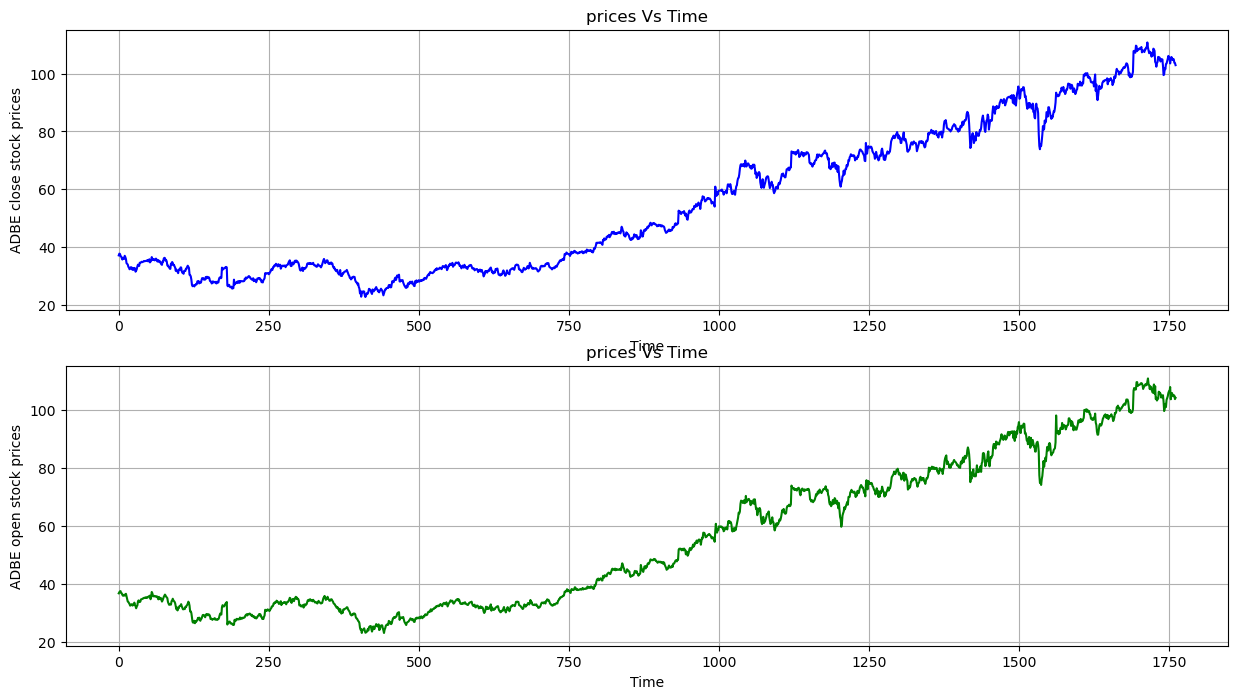

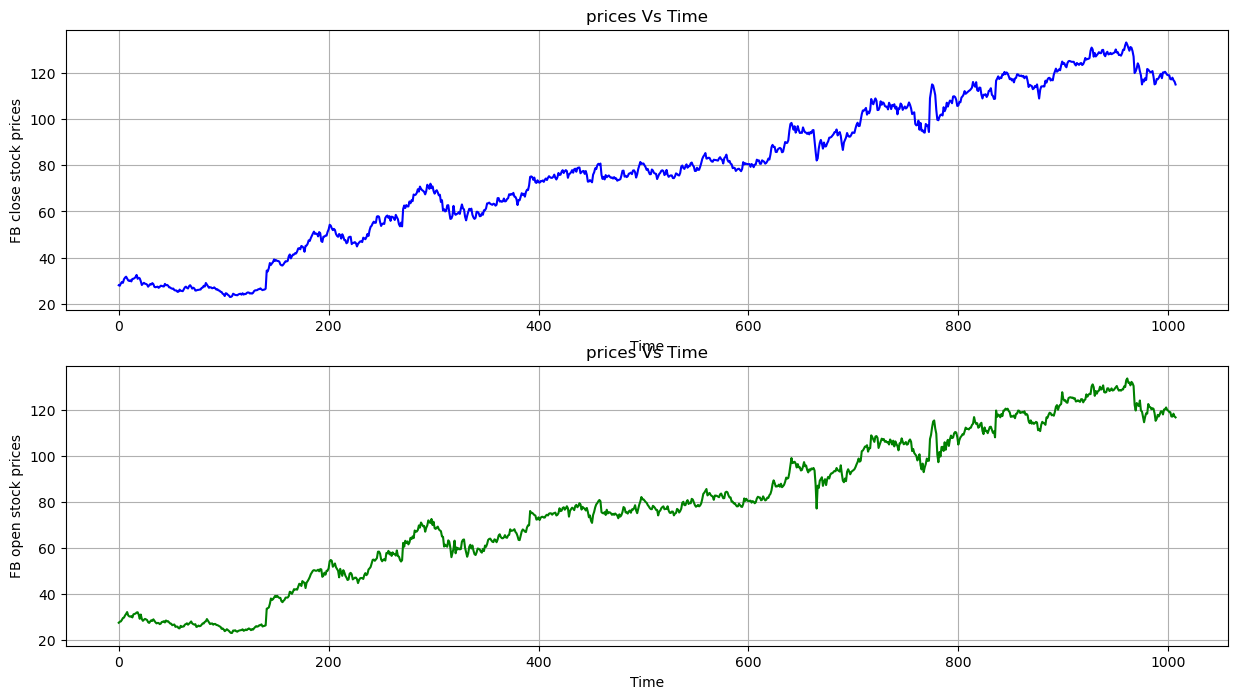

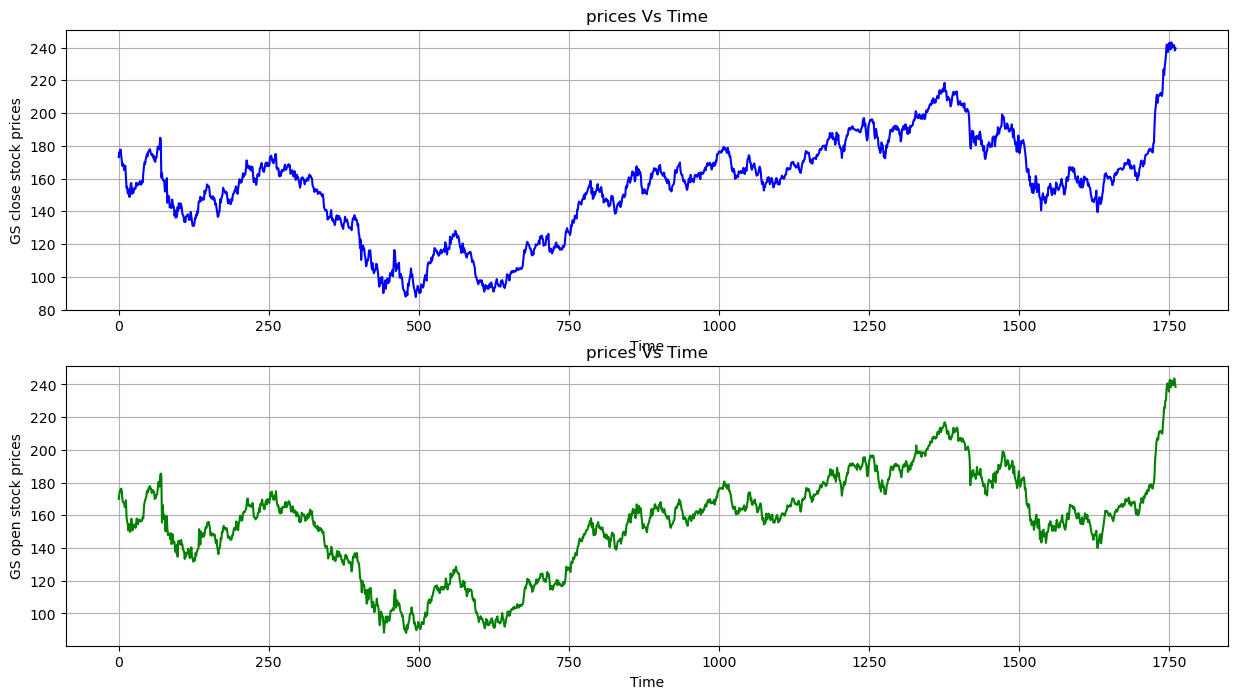

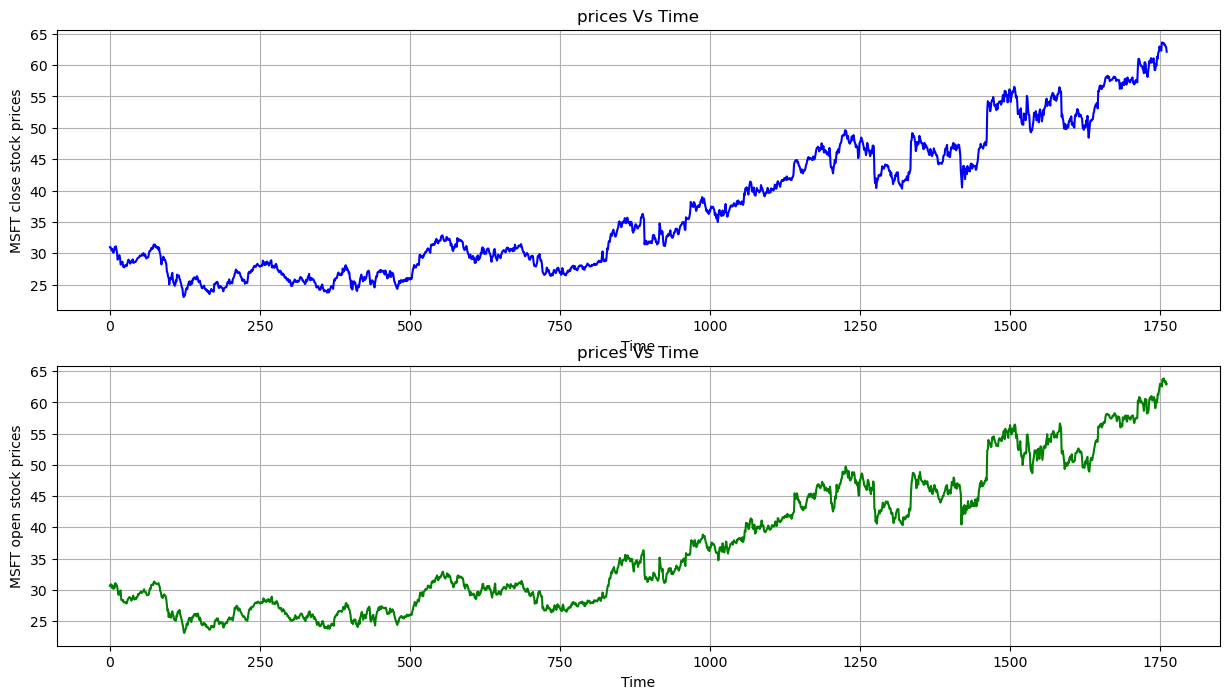

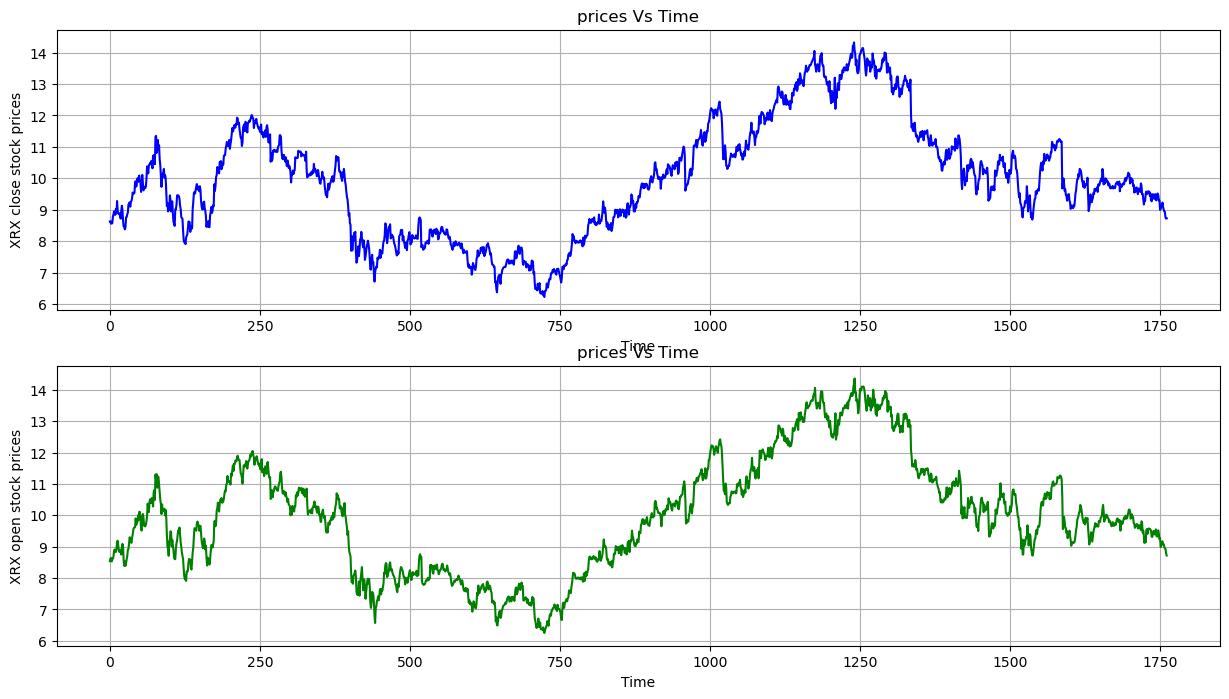

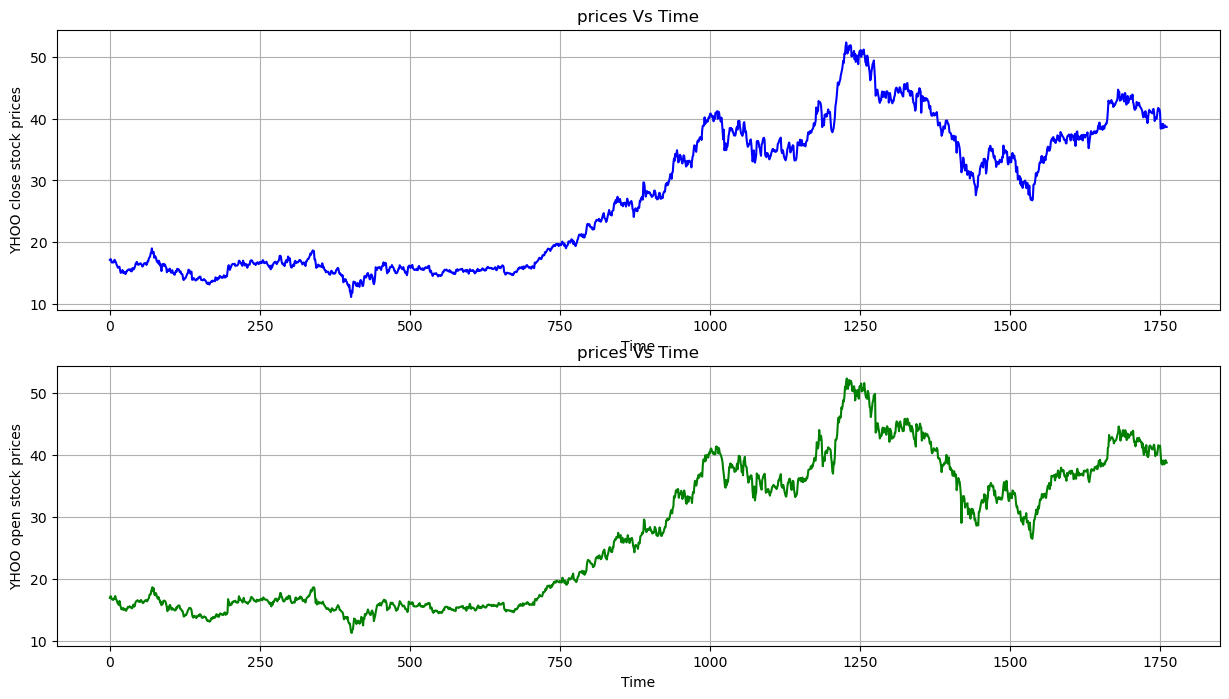

In [29]:
for i in comp_plot:
    plotter(i)

In [30]:
stocks= np.array (df[df.symbol.isin (['YHOO'])].close)
print(stocks)

[17.1      17.23     17.17     ... 38.73     38.639999 38.669998]


In [31]:
display (stocks.shape)

(1762,)

In [32]:
stocks = stocks.reshape(len(stocks) , 1)
print (stocks.shape)
print(stocks)

(1762, 1)
[[17.1     ]
 [17.23    ]
 [17.17    ]
 ...
 [38.73    ]
 [38.639999]
 [38.669998]]


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
display (stocks)

array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.66957366],
       [0.6673934 ],
       [0.66812012]])

In [34]:
print (stocks.shape) 

(1762, 1)


In [35]:
train = int(len(stocks) * 0.80)
print (train)

1409


In [36]:
test = len(stocks) - train 
print (test)

353


In [37]:
train = stocks[0:train]
display (train.shape)
print(train)

(1409, 1)

[[0.14559109]
 [0.14874031]
 [0.14728683]
 ...
 [0.63372095]
 [0.61458332]
 [0.61967051]]


In [38]:
test = stocks[len(train) : ]
display(test.shape)
display (test)

(353, 1)

array([[0.63129851],
       [0.60416666],
       [0.56686053],
       [0.6017442 ],
       [0.60925394],
       [0.60586237],
       [0.59593022],
       [0.58381782],
       [0.55741276],
       [0.52906978],
       [0.48982557],
       [0.50024226],
       [0.51913761],
       [0.54748061],
       [0.53415697],
       [0.51235471],
       [0.49685079],
       [0.500969  ],
       [0.51962213],
       [0.49636629],
       [0.47989342],
       [0.4949128 ],
       [0.48594962],
       [0.49273257],
       [0.46584303],
       [0.48328492],
       [0.49200583],
       [0.48062017],
       [0.47601745],
       [0.48643412],
       [0.46778102],
       [0.45179265],
       [0.44210272],
       [0.43701549],
       [0.39995156],
       [0.41593993],
       [0.43168606],
       [0.43168606],
       [0.47529068],
       [0.47868218],
       [0.48134689],
       [0.50339151],
       [0.51550386],
       [0.51913761],
       [0.52737407],
       [0.51477714],
       [0.50872094],
       [0.542

In [39]:
def process_data(data , n_features):
    dataX, dataY = [], [] 
    for i in range(len(data)-n_features):
        a = data[i:(i+n_features), 0]
        dataX.append(a) 
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
n_features = 2
trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)

(1407, 2) (1407,)


In [43]:
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)

(351, 2) (351,)


In [44]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)

(1760, 2) (1760,)


In [45]:
display (trainX[:10])

array([[0.14559109, 0.14874031],
       [0.14874031, 0.14728683],
       [0.14728683, 0.13590119],
       [0.13590119, 0.13590119],
       [0.13590119, 0.13687016],
       [0.13687016, 0.13541667],
       [0.13541667, 0.14074613],
       [0.14074613, 0.14607561],
       [0.14607561, 0.13880814],
       [0.13880814, 0.13711241]])

In [46]:
display (trainY[:10])

array([0.14728683, 0.13590119, 0.13590119, 0.13687016, 0.13541667,
       0.14074613, 0.14607561, 0.13880814, 0.13711241, 0.1281492 ])

In [47]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)

(1407, 1, 2)

In [48]:
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)

(351, 1, 2)

In [49]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)

(1760, 1, 2)

In [57]:
import math 
from keras.models import Sequential 
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
from keras.layers import LSTM , GRU
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error 
from tensorflow.keras.optimizers import Adam,SGD , RMSprop

In [80]:
filepath="stock_weights1.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta =0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [102]:
model = Sequential()
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 1, 256)            199680    
                                                                 
 dropout_6 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741,505
Trainable params: 741,505
Non-tr

In [89]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])

In [90]:
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    

Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 756.5470 - mean_squared_error: 756.5470
Epoch 1: val_loss improved from -inf to 1319.27258, saving model to stock_weights1.hdf5
11/11 [==============================] - 12s 292ms/step - loss: 756.5470 - mean_squared_error: 756.5470 - val_loss: 1319.2726 - val_mean_squared_error: 1319.2726 - lr: 5.0000e-04
Epoch 2/100
 9/11 [=======================>......] - ETA: 0s - loss: 744.7646 - mean_squared_error: 744.7646
Epoch 2: val_loss did not improve from 1319.27258
11/11 [==============================] - 1s 68ms/step - loss: 742.9017 - mean_squared_error: 742.9017 - val_loss: 1281.3169 - val_mean_squared_error: 1281.3169 - lr: 5.0000e-04
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 706.6879 - mean_squared_error: 706.6879
Epoch 3: val_loss did not improve from 1319.27258
11/11 [==============================] - 0s 34ms/step - loss: 706.6879 - mean_squared_error: 706.6879 - val_loss: 1185.0981 - val


Epoch 22: ReduceLROnPlateau reducing learning rate to 5.000000332466102e-19.
11/11 [==============================] - 0s 32ms/step - loss: 18.2854 - mean_squared_error: 18.2854 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 5.0000e-18
Epoch 23/100
 9/11 [=======================>......] - ETA: 0s - loss: 17.4998 - mean_squared_error: 17.4998
Epoch 23: val_loss did not improve from 1319.27258

Epoch 23: ReduceLROnPlateau reducing learning rate to 5.000000229068525e-20.
11/11 [==============================] - 1s 44ms/step - loss: 17.5994 - mean_squared_error: 17.5994 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 5.0000e-19
Epoch 24/100
10/11 [==========================>...] - ETA: 0s - loss: 17.6088 - mean_squared_error: 17.6088
Epoch 24: val_loss did not improve from 1319.27258

Epoch 24: ReduceLROnPlateau reducing learning rate to 5.00000016444504e-21.
11/11 [==============================] - 0s 38ms/step - loss: 17.3834 - mean_squared_error: 17.3834 - val_loss:

11/11 [==============================] - 0s 36ms/step - loss: 17.2291 - mean_squared_error: 17.2291 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 5.0000e-38
Epoch 43/100
10/11 [==========================>...] - ETA: 0s - loss: 17.4246 - mean_squared_error: 17.4246
Epoch 43: val_loss did not improve from 1319.27258

Epoch 43: ReduceLROnPlateau reducing learning rate to 5.000001076526666e-40.
11/11 [==============================] - 0s 34ms/step - loss: 17.7308 - mean_squared_error: 17.7308 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 5.0000e-39
Epoch 44/100
10/11 [==========================>...] - ETA: 0s - loss: 17.6882 - mean_squared_error: 17.6882
Epoch 44: val_loss did not improve from 1319.27258

Epoch 44: ReduceLROnPlateau reducing learning rate to 5.000001076526667e-41.
11/11 [==============================] - 1s 45ms/step - loss: 17.4036 - mean_squared_error: 17.4036 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 5.0000e-40
Epoch 45/100
11/11 

Epoch 66/100
10/11 [==========================>...] - ETA: 0s - loss: 17.6444 - mean_squared_error: 17.6444
Epoch 66: val_loss did not improve from 1319.27258
11/11 [==============================] - 0s 33ms/step - loss: 17.9321 - mean_squared_error: 17.9321 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 0.0000e+00
Epoch 67/100
11/11 [==============================] - ETA: 0s - loss: 17.5609 - mean_squared_error: 17.5609
Epoch 67: val_loss did not improve from 1319.27258
11/11 [==============================] - 0s 41ms/step - loss: 17.5609 - mean_squared_error: 17.5609 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 0.0000e+00
Epoch 68/100
10/11 [==========================>...] - ETA: 0s - loss: 17.7319 - mean_squared_error: 17.7319
Epoch 68: val_loss did not improve from 1319.27258
11/11 [==============================] - 0s 29ms/step - loss: 17.8486 - mean_squared_error: 17.8486 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 0.0000e+00
Epoch 69/100
10/

Epoch 91/100
11/11 [==============================] - ETA: 0s - loss: 17.8594 - mean_squared_error: 17.8594
Epoch 91: val_loss did not improve from 1319.27258
11/11 [==============================] - 0s 33ms/step - loss: 17.8594 - mean_squared_error: 17.8594 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 0.0000e+00
Epoch 92/100
10/11 [==========================>...] - ETA: 0s - loss: 17.6942 - mean_squared_error: 17.6942
Epoch 92: val_loss did not improve from 1319.27258
11/11 [==============================] - 0s 43ms/step - loss: 17.7317 - mean_squared_error: 17.7317 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 0.0000e+00
Epoch 93/100
 9/11 [=======================>......] - ETA: 0s - loss: 17.3917 - mean_squared_error: 17.3917
Epoch 93: val_loss did not improve from 1319.27258
11/11 [==============================] - 0s 42ms/step - loss: 17.9002 - mean_squared_error: 17.9002 - val_loss: 4.3796 - val_mean_squared_error: 4.3796 - lr: 0.0000e+00
Epoch 94/100
 9/

In [91]:
test_pred = model.predict(testX)
display (test_pred [:10])

11/11 [==============================] - 2s 6ms/step


array([[38.311623],
       [37.29212 ],
       [37.27279 ],
       [37.937466],
       [37.999332],
       [37.787773],
       [37.437855],
       [36.817127],
       [35.925766],
       [34.80072 ]], dtype=float32)

In [92]:
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])

array([[1592.5938],
       [1550.5088],
       [1549.7107],
       [1577.1486],
       [1579.7024],
       [1570.9692],
       [1556.5247],
       [1530.901 ],
       [1494.1056],
       [1447.6637]], dtype=float32)

In [93]:
testY = testY.reshape(testY.shape[0] , 1)
testY = scaler.inverse_transform(testY)
display (testY[:10])

array([[1434.83724807],
       [1494.28036407],
       [1507.07724632],
       [1501.29788134],
       [1484.37312303],
       [1463.73312353],
       [1418.73788334],
       [1370.44036707],
       [1303.56672741],
       [1321.31716826]])

In [94]:
from sklearn.metrics import r2_score
print (r2_score(testY,test_pred))

0.7733247347490092


Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


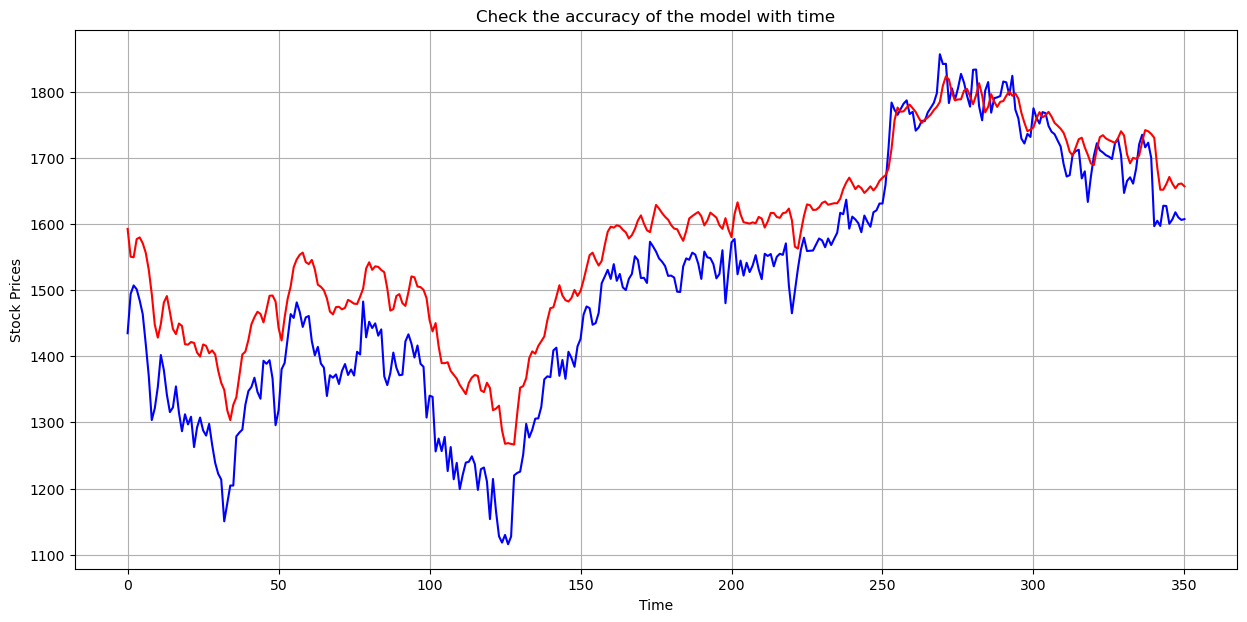

In [95]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)

plt.plot(testY , 'b')

plt.plot(test_pred , 'r')

plt.xlabel('Time')

plt.ylabel('Stock Prices')

plt.title('Check the accuracy of the model with time')
 
plt.grid(True)

plt.show()

In [96]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))

44/44 [==============================] - 0s 5ms/step
Display Accuracy Training Data


0.8965621345756729

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


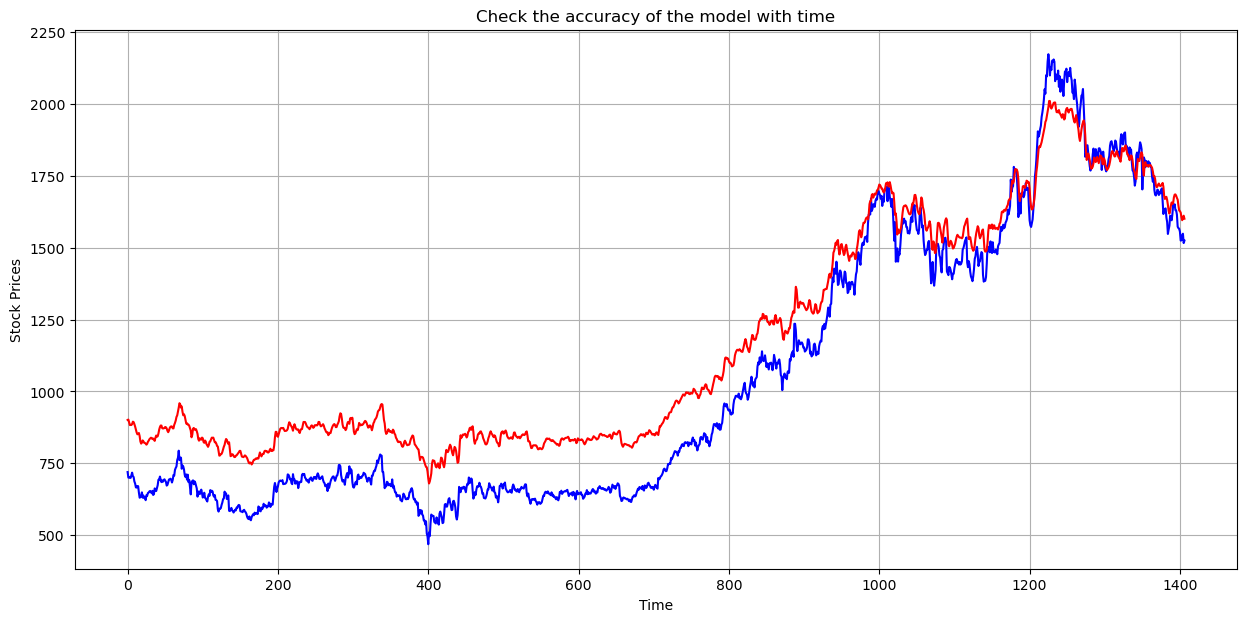

In [97]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [98]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))

55/55 [==============================] - 0s 4ms/step
Display Accuracy Training Data


0.9089358749807784

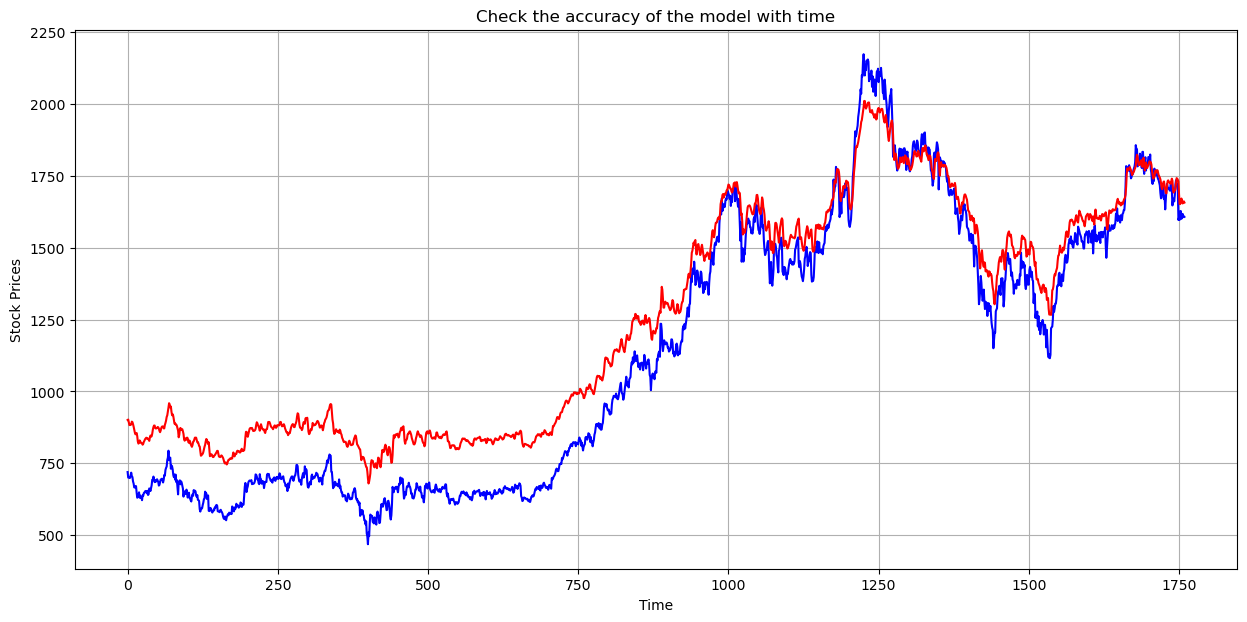

In [99]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [100]:
results= df[df.symbol.isin (['YHOO'])]
results= results [2:]
results = results.reset_index(drop=True)
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_csv('results.csv')
display(results)

,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,901.098694
1,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,902.386780
2,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,892.053406
3,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0,883.148193
4,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0,883.931213
...,...,...,...,...,...,...,...,...
1755,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0,1661.075562
1756,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0,1653.921631
1757,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0,1660.256470
1758,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0,1661.192139
